# 비트코인 시세 예측하기

### market price 데이터셋의 기본 정보 구하기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = 'c:/price.csv'
bitcoin = pd.read_csv(path, names = ['day','price'])[1:]
bitcoin

,day,price
1,2020-06-28 00:00:00,9004.23
2,2020-06-29 00:00:00,9127.47
3,2020-06-30 00:00:00,9185.35
4,2020-07-01 00:00:00,9133.97
5,2020-07-02 00:00:00,9236.38
...,...,...
362,2021-06-24 00:00:00,33674.66
363,2021-06-25 00:00:00,34639.38
364,2021-06-26 00:00:00,31640.58
365,2021-06-27 00:00:00,32160.91


In [75]:
bitcoin['day'] = pd.to_datetime(bitcoin['day'])
bitcoin.set_index('day',inplace=True)
bitcoin = bitcoin.astype('float')

bitcoin

,price
day,
2020-06-28,9004.23
2020-06-29,9127.47
2020-06-30,9185.35
2020-07-01,9133.97
2020-07-02,9236.38
...,...
2021-06-24,33674.66
2021-06-25,34639.38
2021-06-26,31640.58


In [76]:
bitcoin_df = bitcoin[:361]
bitcoin_df

,price
day,
2020-06-28,9004.23
2020-06-29,9127.47
2020-06-30,9185.35
2020-07-01,9133.97
2020-07-02,9236.38
...,...
2021-06-19,35729.82
2021-06-20,35524.17
2021-06-21,35592.35


<AxesSubplot:xlabel='day'>

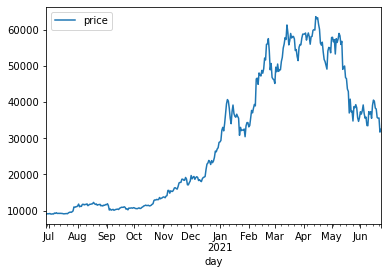

In [77]:
bitcoin_df = bitcoin_df.astype('float')
bitcoin_df.plot()

### 시계열 분석(ARIMA)

In [78]:
# 차분치는 편의상 1로 가정
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# order = (AR, 차분, MA)
model = ARIMA(bitcoin_df.values, order=(2,1,2))
model_fit = model.fit(trend='c',full_output=True,disp=True)

print(model_fit.summary())

C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  360
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3149.460
Method:                       css-mle   S.D. of innovations           1524.619
Date:                Tue, 29 Jun 2021   AIC                           6310.921
Time:                        17:03:31   BIC                           6334.237
Sample:                             1   HQIC                          6320.192
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.9282     87.761      0.717      0.473    -109.081     234.937
ar.L1.D.y      0.4659      0.358      1.300      0.194      -0.237       1.168
ar.L2.D.y     -0.0101      0.284     -0.036      0.9

C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [79]:
# 책에 나와있는 데로 AR과 MA를 각각 2로 두면 p-value>0.05

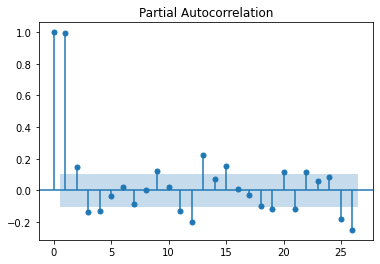

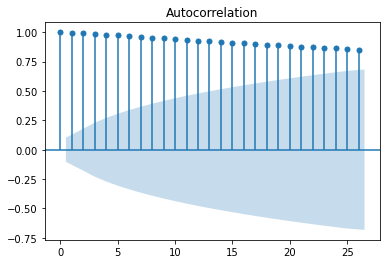

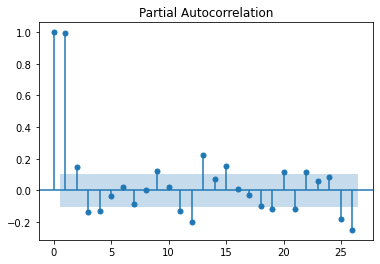

In [80]:
# AR과 MA의 모수를 추정하기위해 ACF plot과 PACF plot 사용
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(bitcoin_df)
plot_pacf(bitcoin_df)

# pacf가 약 1에서 급격히 감소
# acf는 완만히 감소하는 형태이다
# 따라서 위 데이터는 AR의 특성을 띤다

In [81]:
# 차분치는 편의상 2로 가정
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# order = (AR, 차분, MA)
# 상수항의 p-value = 0.341 -> trend = nc
model = ARIMA(bitcoin_df.values, order=(1,2,0))
model_fit = model.fit(trend='nc',full_output=True,disp=True)

print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  359
Model:                 ARIMA(1, 2, 0)   Log Likelihood               -3210.252
Method:                       css-mle   S.D. of innovations           1849.478
Date:                Tue, 29 Jun 2021   AIC                           6424.505
Time:                        17:03:35   BIC                           6432.271
Sample:                             2   HQIC                          6427.593
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D2.y    -0.5955      0.043    -13.983      0.000      -0.679      -0.512
                                    Roots                                    
                  Real          Imaginary           M

C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<AxesSubplot:>

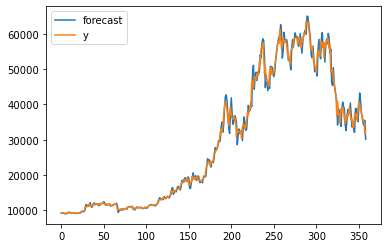

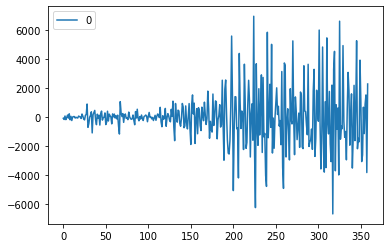

In [82]:
model_fit.plot_predict()
res = pd.DataFrame(model_fit.resid)
res.plot()

### ARIMA 모델 평가

In [83]:
forecast_data = model_fit.forecast(steps=5)

bitcoin_test_df = bitcoin.iloc[361:]

pred_y = forecast_data[0].tolist()
test_y = bitcoin_test_df.values

pred_y_lower = []
pred_y_upper = []

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

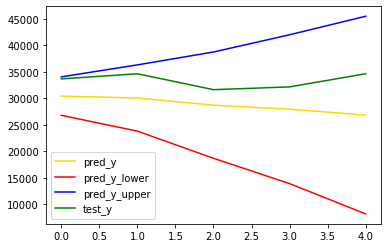

In [84]:
plt.plot(pred_y,color='gold',label='pred_y')
plt.plot(pred_y_lower,color='red',label='pred_y_lower')
plt.plot(pred_y_upper,color='blue',label='pred_y_upper')
plt.plot(test_y,color='green',label='test_y')
plt.legend()

4868.323623067436


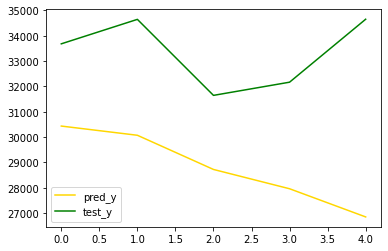

In [85]:
import numpy as np
from sklearn.metrics import mean_squared_error 

plt.plot(pred_y,color='gold',label='pred_y')
plt.plot(test_y,color='green',label='test_y')
plt.legend()

rmse = np.sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

### 시계열 분석(Facebook Prophet)

In [86]:
from fbprophet import Prophet
import pandas as pd
# seasonality_mode : 월간 주간 등 트렌드성을 반영하는 것을 의미하는 파라미터
# changepoint_prior_scale : 트렌드가 변경되는 문맥을 반영하는 파라미터
#                           수치가 높을수록 과적합

path = 'c:/price.csv'
bitcoin = pd.read_csv(path, names = ['ds','y'])[1:]
bitcoin

,ds,y
1,2020-06-28 00:00:00,9004.23
2,2020-06-29 00:00:00,9127.47
3,2020-06-30 00:00:00,9185.35
4,2020-07-01 00:00:00,9133.97
5,2020-07-02 00:00:00,9236.38
...,...,...
362,2021-06-24 00:00:00,33674.66
363,2021-06-25 00:00:00,34639.38
364,2021-06-26 00:00:00,31640.58
365,2021-06-27 00:00:00,32160.91


In [ ]:
prophet = Prophet()
prophet.fit(bitcoin)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


KeyError: 'metric_file'

### 모델 성능 향상

In [3]:
path = 'c:/price.csv'

bitcoin = pd.read_csv(path)
bitcoin['Timestamp'] = pd.to_datetime(bitcoin.Timestamp)
bitcoin['market-price'] = bitcoin['market-price'].astype('float')

bitcoin.set_index('Timestamp', inplace=True)

In [4]:
bitcoin_train = bitcoin[:361]
bitcoin_test = bitcoin[361:]

print(bitcoin.shape, bitcoin_train.shape, bitcoin_test.shape)
bitcoin

(366, 1) (361, 1) (5, 1)


,market-price
Timestamp,
2020-06-28,9004.23
2020-06-29,9127.47
2020-06-30,9185.35
2020-07-01,9133.97
2020-07-02,9236.38
...,...
2021-06-24,33674.66
2021-06-25,34639.38
2021-06-26,31640.58


In [5]:
from pmdarima import auto_arima

best_fit = auto_arima(bitcoin_train, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6311.627, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6311.880, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6310.061, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6310.686, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6310.522, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6309.362, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6309.403, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6310.068, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6310.976, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6311.350, Time=0.37 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=6308.006, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=6308.875, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=6307.921, Time=0.12 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=6309.775, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0]          

In [6]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

model = ARIMA(bitcoin_train, order=(3,1,0))
model_fit = model.fit(trend='c',full_output=True,disp=True)

print(model_fit.summary())

C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D

                             ARIMA Model Results                              
Dep. Variable:         D.market-price   No. Observations:                  360
Model:                 ARIMA(3, 1, 0)   Log Likelihood               -3149.464
Method:                       css-mle   S.D. of innovations           1524.636
Date:                Tue, 29 Jun 2021   AIC                           6308.928
Time:                        17:04:53   BIC                           6328.359
Sample:                    06-29-2020   HQIC                          6316.654
                         - 06-23-2021                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   63.1565     86.336      0.732      0.464    -106.059     232.372
ar.L1.D.market-price    -0.1030      0.052     -1.962      0.050      -0.206      -0.000
ar.L2.D.mark

<AxesSubplot:xlabel='Timestamp'>

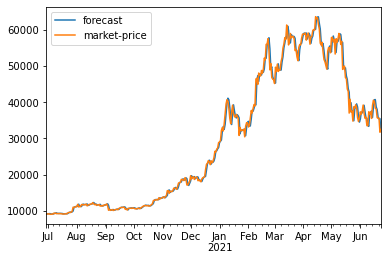

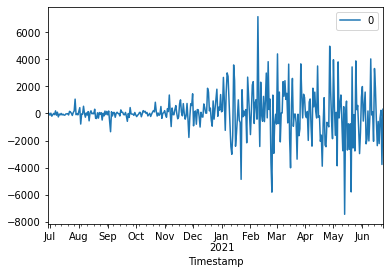

In [7]:
model_fit.plot_predict()
res = pd.DataFrame(model_fit.resid)
res.plot()

In [8]:
forecast_data = model_fit.forecast(steps=5)

bitcoin_test_df = bitcoin.iloc[361:]

pred_y = forecast_data[0].tolist()
test_y = bitcoin_test_df.values

pred_y_lower = []
pred_y_upper = []

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

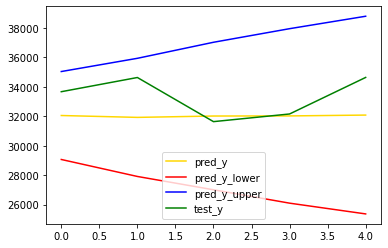

In [9]:
plt.plot(pred_y,color='gold',label='pred_y')
plt.plot(pred_y_lower,color='red',label='pred_y_lower')
plt.plot(pred_y_upper,color='blue',label='pred_y_upper')
plt.plot(test_y,color='green',label='test_y')
plt.legend()

1825.790451985064


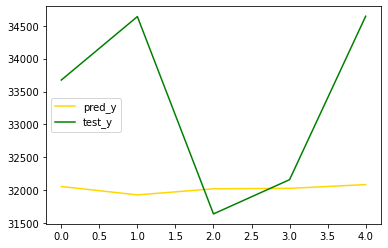

In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error 

plt.plot(pred_y,color='gold',label='pred_y')
plt.plot(test_y,color='green',label='test_y')
plt.legend()

rmse = np.sqrt(mean_squared_error(pred_y, test_y))
print(rmse)